# 7_HDBSCAN - Customer Clustering

In [2]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import  HDBSCAN


In [3]:

# Load dataset
df = pd.read_csv("Mall_Customers.csv")  # Make sure this file is in the working directory
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

# Preprocess: Remove non-numeric and irrelevant columns
df_cleaned = df.drop(columns=["CustomerID", "Genre"])
X = df_cleaned.values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:

# Install hdbscan if not already installed
%pip install hdbscan

import hdbscan

# Run HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df['Cluster'] = clusterer.fit_predict(X_scaled)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 14.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.40-cp313-cp313-linux_x86_64.whl size=850636 sha256=9ac72bf8f81301a76029ec781e931c6c766266454a830d22c94615834e4e93e2
  Stored in directory: /home/deehub/.cache/pip/wheels/c3/72/af/f4d00f372c844119d65a75541288c9a23c23696de08a71b7ec
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


/home/deehub/anaconda3/envs/AI/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/deehub/anaconda3/envs/AI/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


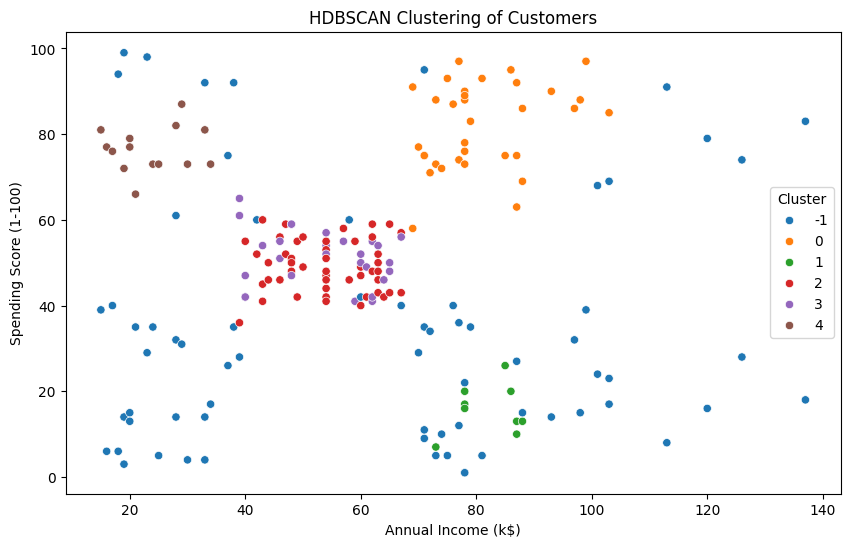

In [7]:

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='tab10')
plt.title("HDBSCAN Clustering of Customers")
plt.show()


In [8]:

# View cluster distribution
df['Cluster'].value_counts()


Cluster
-1    69
 2    48
 0    33
 3    27
 4    14
 1     9
Name: count, dtype: int64